# Data Preprocessing

In [1]:
import pandas as pd

# Load the dataset
file_path = "../merged_flight_weather_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows and basic info about the dataset
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81710 entries, 0 to 81709
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FlightDepDateTime      81708 non-null  object 
 1   DepDelayMin            81710 non-null  float64
 2   Origin                 81710 non-null  object 
 3   Dest                   81710 non-null  object 
 4   WeatherDelay           8191 non-null   float64
 5   Date                   81710 non-null  object 
 6   Weather_Intensity      9399 non-null   object 
 7   Weather_Obscuration    5265 non-null   object 
 8   Weather_Other          1 non-null      object 
 9   Weather_Precipitation  4087 non-null   object 
 10  Wind_Direction         80667 non-null  float64
 11  Wind_Gusts             15655 non-null  float64
 12  Wind_Speed             81703 non-null  float64
 13  Visibility             81702 non-null  float64
dtypes: float64(6), object(8)
memory usage: 8.7+ MB


/var/folders/1p/n4zx7q450tn1b9v4zgmd_0z40000gn/T/ipykernel_42343/2060395104.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(None,
      FlightDepDateTime  DepDelayMin Origin Dest  WeatherDelay  \
 0  2020-01-01 04:57:00         -3.0    BOS  IAH           NaN   
 1  2020-01-01 04:57:00         -3.0    BOS  IAH           NaN   
 2  2020-01-01 04:57:00         -4.0    BOS  RSW           NaN   
 3  2020-01-01 04:57:00         -4.0    BOS  RSW           NaN   
 4  2020-01-01 04:59:00         -1.0    BOS  MYR           NaN   
 
                   Date Weather_Intensity Weather_Obscuration Weather_Other  \
 0  2020-01-01 04:54:00               NaN                 NaN           NaN   
 1  2020-01-01 04:54:00               NaN                 NaN           NaN   
 2  2020-01-01 04:54:00               NaN                 NaN           NaN   
 3  2020-01-01 04:54:00               NaN                 NaN           NaN   
 4  2020-01-01 04:54:00               NaN                 NaN           NaN   
 
   Weather_Precipitation  Wind_Direction  Wind_Gusts  Wind_Speed  Visibility  
 0                   NaN           240.0

In [2]:
# Step 1: Create "isDelayed" feature based on "DepDelayMin"
df['isDelayed'] = df['DepDelayMin'] > 0

# Step 2: Calculate correlation matrices
# Encoding "Origin" and "Dest" as categorical for correlation calculation
df_encoded = df.copy()
df_encoded['Origin'] = df_encoded['Origin'].astype('category').cat.codes
df_encoded['Dest'] = df_encoded['Dest'].astype('category').cat.codes

# Calculate correlation matrix between "Origin", "Dest", and "isDelayed"
corr_origin_dest = df_encoded[['Origin', 'Dest', 'isDelayed']].corr()

# Calculate correlation matrix between "Date" and "isDelayed"
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'], errors='coerce').astype(int, errors='ignore')
corr_date_isDelayed = df_encoded[['Date', 'isDelayed']].corr()

# Calculate correlation matrix between "WeatherDelay" and "isDelayed"
corr_weatherdelay_isDelayed = df_encoded[['WeatherDelay', 'DepDelayMin']].corr()

# Step 3: Drop specified columns
columns_to_drop = ["Origin", "Dest", "Weather_Other", "Date", "WeatherDelay", "DepDelayMin"]
df_dropped = df.drop(columns=columns_to_drop)

# Step 4: Drop rows where "FlightDepDateTime" is missing
df_cleaned = df_dropped.dropna(subset=["FlightDepDateTime"])

# Display correlation matrices and the resulting DataFrame structure after cleanup
corr_origin_dest, corr_date_isDelayed, corr_weatherdelay_isDelayed, df_cleaned.head()


(           Origin      Dest  isDelayed
 Origin        NaN       NaN        NaN
 Dest          NaN  1.000000   0.007411
 isDelayed     NaN  0.007411   1.000000,
                Date  isDelayed
 Date       1.000000  -0.108244
 isDelayed -0.108244   1.000000,
               WeatherDelay  DepDelayMin
 WeatherDelay      1.000000     0.357008
 DepDelayMin       0.357008     1.000000,
      FlightDepDateTime Weather_Intensity Weather_Obscuration  \
 0  2020-01-01 04:57:00               NaN                 NaN   
 1  2020-01-01 04:57:00               NaN                 NaN   
 2  2020-01-01 04:57:00               NaN                 NaN   
 3  2020-01-01 04:57:00               NaN                 NaN   
 4  2020-01-01 04:59:00               NaN                 NaN   
 
   Weather_Precipitation  Wind_Direction  Wind_Gusts  Wind_Speed  Visibility  \
 0                   NaN           240.0         NaN        12.0        10.0   
 1                   NaN           240.0         NaN        12.0  

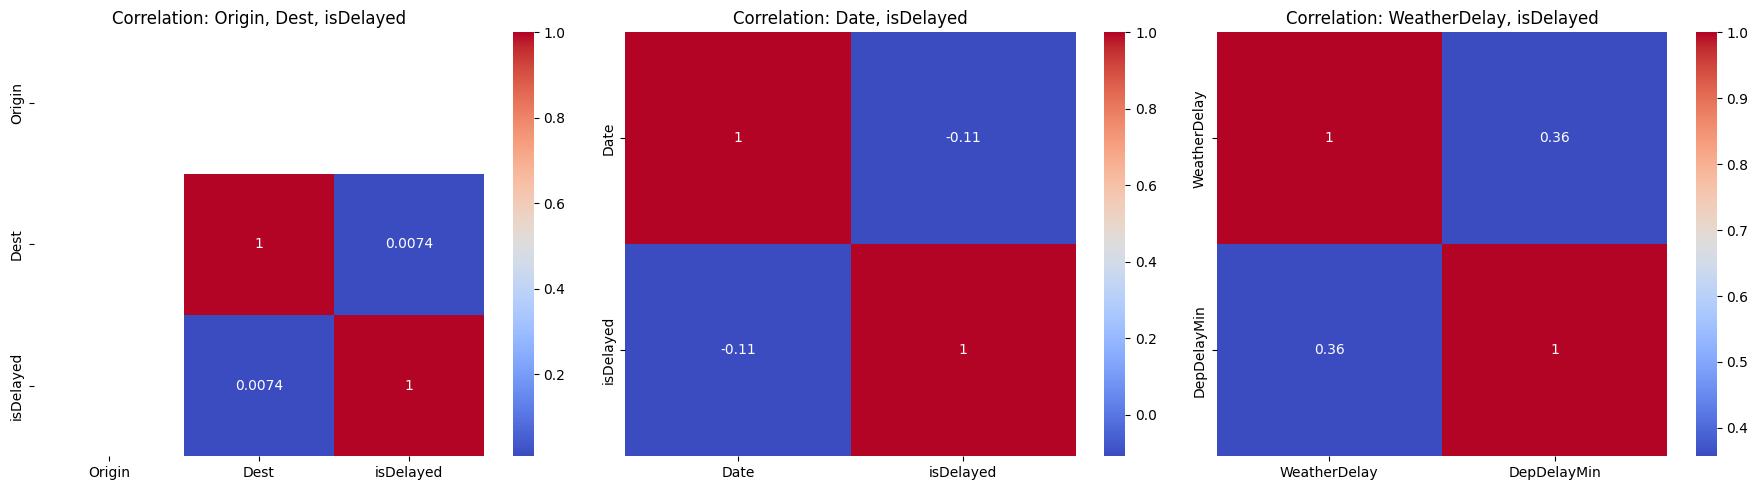

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting area to accommodate multiple plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the correlation matrix for Origin, Dest, and isDelayed
sns.heatmap(corr_origin_dest, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation: Origin, Dest, isDelayed')

# Plot the correlation matrix for Date and isDelayed
sns.heatmap(corr_date_isDelayed, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation: Date, isDelayed')

# Plot the correlation matrix for WeatherDelay and isDelayed
sns.heatmap(corr_weatherdelay_isDelayed, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Correlation: WeatherDelay, isDelayed')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# df_cleaned.sample(n=10000, random_state=42).to_csv("data_preprocessing.csv", sep=',', index=False, encoding='utf-8')
df_cleaned.to_csv("data_preprocessing.csv", sep=',', index=False, encoding='utf-8')